<a href="https://colab.research.google.com/github/ahashwini/Git_hub/blob/master/Titanic_Train(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # EDA with Titanic_Train



In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
train = pd.read_csv('/archive (1).zip')

In [206]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
#  Here we need to check passenger is survived or not
# Sibsp is sibling or spouse
# parch is parent or child

**CHeck for missing or Null values**

In [157]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


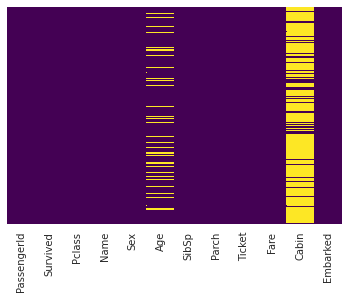

In [207]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

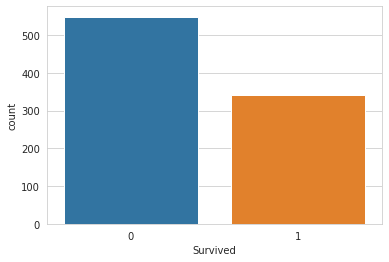

In [159]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

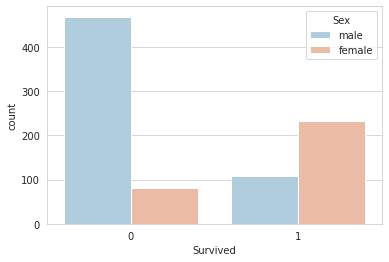

In [160]:
sns.countplot(x='Survived', hue='Sex',data=train,palette='RdBu_r') 

In [209]:
women = train.loc[train.Sex=='female']['Survived']
rate_women = sum(women/len(women))
print('% of women who survived:',rate_women)

% of women who survived: 0.7420382165605095


In [210]:
men = train.loc[train.Sex=='male']['Survived']
rate_men = sum(men/len(men))
print('% of men who survived:',rate_men)

% of men who survived: 0.1889081455805897


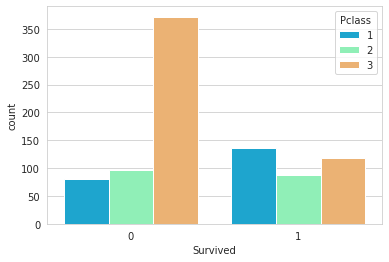

In [161]:
sns.countplot(x='Survived',data=train,hue='Pclass',palette='rainbow')

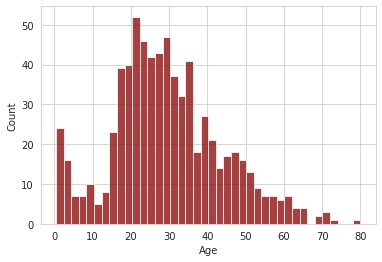

In [162]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

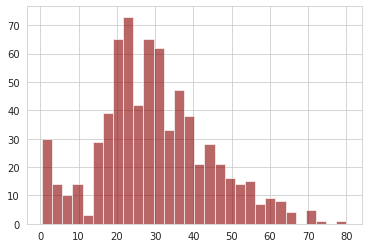

In [163]:
train['Age'].hist(bins = 30,color='darkred',alpha=0.6)

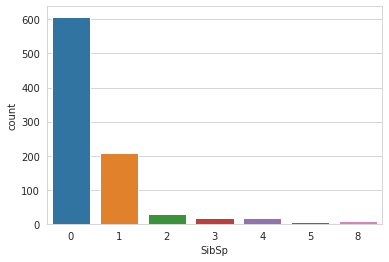

In [164]:
sns.countplot(x='SibSp',data=train)

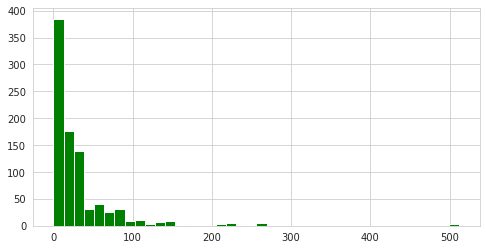

In [165]:
# train['Fare'].hist()
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

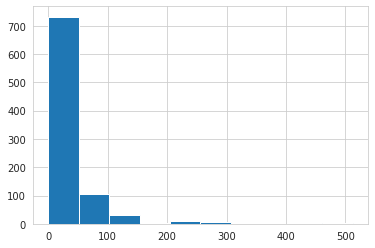

In [166]:
train['Fare'].hist()


In [167]:
import cufflinks as cf

In [168]:
cf.go_offline()

In [169]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

**Data Cleaning** on age column

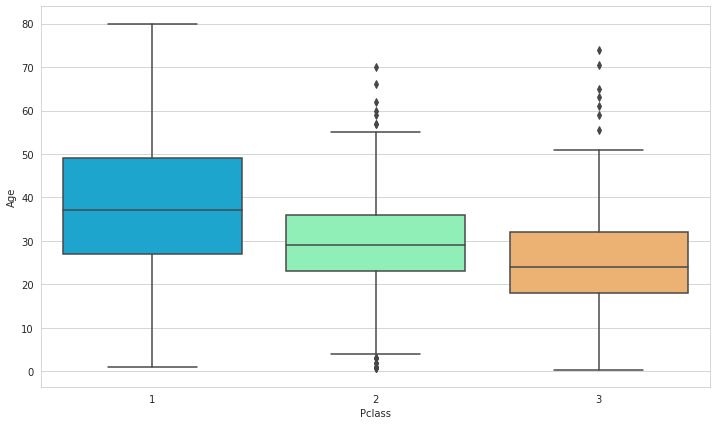

In [170]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

We can see that wealthier passengers in higher class tend to be older.We will use the avarage age values to impute based on Pclass for age. 

In [171]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

      if Pclass == 1:
        return 37

      elif Pclass == 2:
        return 29

      else:
        return 24

    else:
      return Age  

In [172]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

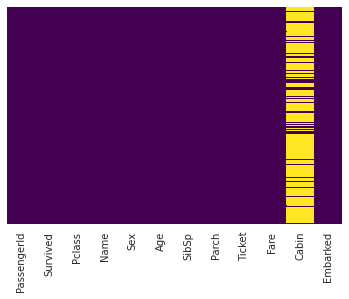

In [173]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [174]:
train.drop('Cabin',axis=1,inplace=True)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


% of men who survived: 0.1889081455805897


In [176]:
train.dropna(inplace=True)

**converting categorical featues** We will convert categorical values into dummy varisbles using pandas!
Warning: Otherwise Machine learning algoritham won't be able to directly take in those features as inputs.

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [179]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [180]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [181]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [182]:
train.drop(['Sex','Ticket','Name','Embarked'],axis=1,inplace=True)

In [183]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [184]:
train =pd.concat([train,sex,embark],axis=1)

In [186]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now divide the data into dependent and independent feature Survived is our dependent feature and rest all is indepenedent features.


In [187]:
# Building logistic Regression Model
# Split data into training set and test set
# Train Test split
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [188]:
# Output data set
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),
                                                 train['Survived'],test_size=0.30,
                                                 random_state=101)

**Training and Prediction**

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [193]:
predictions=logmodel.predict(X_test)

In [194]:
from sklearn.metrics import confusion_matrix 

In [196]:
accuracy=confusion_matrix(y_test,predictions)

In [198]:
accuracy

array([[149,  14],
       [ 39,  65]])

In [199]:
from sklearn.metrics import accuracy_score

In [200]:
accuracy=accuracy_score(y_test,predictions)

In [201]:
accuracy

0.8014981273408239

In [202]:
predictions


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])